<a href="https://colab.research.google.com/github/JManuelRG/simuladores/blob/main/Modelo_de_Margules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Margules de coeficiente de actividad.
 Información Teórica en el Blog:

 https://basicosingenieria.blogspot.com/2024/10/margules.html


<ipython-input-19-75753ca0cd81>:47: RuntimeWarning: invalid value encountered in scalar divide
  GERTx[i]=GERT[i]/(x1[i]*x2[i])


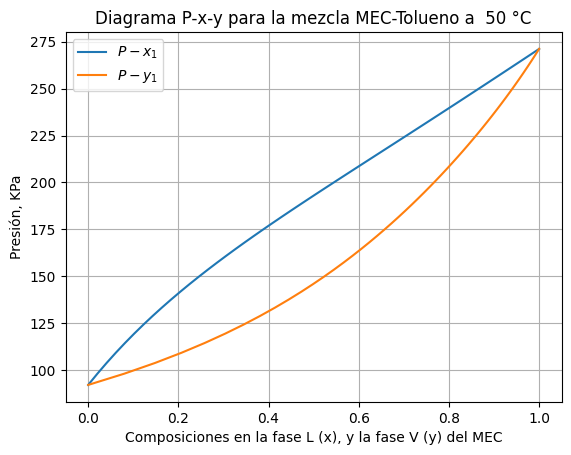

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp
#Condiciones
T=50 #Celsius

"""
Datos Antoine
#POLING, BRUCE; PRAUSNITZ, JOHN & O'CONNELL, JOHN.
"The Properties of Gases and Liquids".
5th edition.  McGraw Hill.  New York.  2001
"""
#1
Tolueno = {"nombre":"tolueno","A":6.95464, "B":1344.8,"C":219.482}
#Metil etil cetona o butanona
#2
MEC = {"nombre":"Metil-Etil-cetona","A":7.2087, "B":1368.21 ,"C":236.51}

#ANtoine
def Psat(sust, T):
    #T en celsius, P en mmHg
    return 10**(sust.get("A")-sust.get("B")/(T+sust.get("C")))

Psat1=Psat(MEC, T)
Psat2=Psat(Tolueno,T)


#Parámetros de margules
A12=0.372
A21=0.198

#Num datos
N = 50

#Valores de x1
x1 = np.linspace(0,1,50)
x2=1-x1

#Energía Gibbs de Exceso
GERT=[0]*N
for i in range(N):
    GERT[i]=(A21*x1[i]+A12*x2[i])*x1[i]*x2[i]

#GERT/x1x2
GERTx=[0]*N
for i in range(N):
    GERTx[i]=GERT[i]/(x1[i]*x2[i])

#Gamma 1
lng1=[0]*N
for i in range(N):
    lng1[i] =  x2[i]**2*(A12+2*(A21-A12)*x1[i])

gamma1=[0]*N
for i in range(N):
    gamma1[i] =  exp(lng1[i])

#Gamma 2
lng2=[0]*N
for i in range(N):
    lng2[i] =  x1[i]**2*(A21+2*(A12-A21)*x2[i])

gamma2=[0]*N
gamma2=[0]*N
for i in range(N):
    gamma2[i] =  exp(lng2[i])

#Presión del sistema
P=[0]*N
for i in range(N):
    P[i]=x1[i]*gamma1[i]*Psat1+x2[i]*gamma2[i]*Psat2


#Fracciones en la fase vapor
y1=[0]*N
for i in range(N):
    y1[i]=x1[i]*gamma1[i]*Psat1/P[i]

#Gráficos
def grids(): #Formato de gráficos
    # Mostrar líneas de cuadrícula mayores color gris oscuro
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    # Mostrar líneas de cuadrícula menores color gris claro
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)



#DIagramA DE EQUILIBRIO
plt.plot(x1,P, label="$P-x_1$")
plt.plot(y1,P,label="$P-y_1$")
plt.xlabel('Composiciones en la fase L (x), y la fase V (y) del MEC')
plt.ylabel('Presión, KPa')
plt.title(f'Diagrama P-x-y para la mezcla MEC-Tolueno a  {T} °C')
plt.legend()
plt.grid()
plt.show()

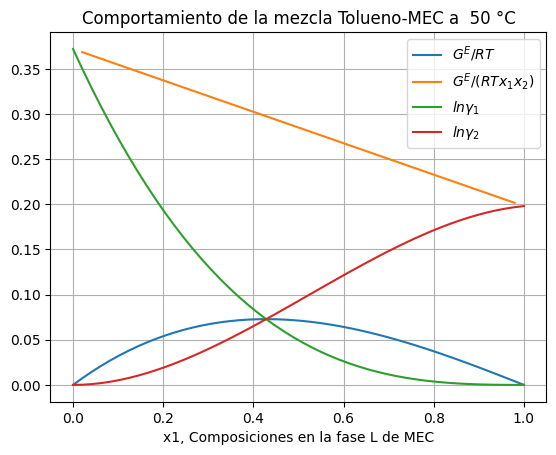

In [18]:
#Diagrama de Propiedades
plt.clf() #Borrar valores de gráfico
plt.plot(x1,GERT, label="$G^E/RT$")
plt.plot(x1,GERTx, label="$G^E/(RTx_1x_2)$")
plt.plot(x1,lng1,label="$ln \gamma_1$")
plt.plot(x1,lng2,label="$ln \gamma_2$")
plt.xlabel('x1, Composiciones en la fase L de MEC')
plt.title(f'Comportamiento de la mezcla Tolueno-MEC a  {T} °C')
plt.legend()
plt.grid()

plt.show() #Mostrar en área de trabajo